In [1]:
!unzip data.zip

Archive:  data.zip
  inflating: sample_submission.csv   
  inflating: test_dataset.csv        
  inflating: train_dataset.csv       


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/train_dataset.csv')
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [3]:
df.columns = [
    'id',
    'gender',
    'customer_type',
    'age',
    'travel_type',
    'class',
    'distance',
    'wifi',
    'time',
    'booking',
    'gate',
    'food',
    'boarding',
    'seat',
    'entertainment',
    'on_board',
    'leg_room',
    'baggage',
    'checkin',
    'inflight',
    'cleanliness',
    'departure_delay',
    'arrival_delay',
    'satisfaction'
]
df.head()

,id,gender,customer_type,age,travel_type,class,distance,wifi,time,booking,...,entertainment,on_board,leg_room,baggage,checkin,inflight,cleanliness,departure_delay,arrival_delay,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10000 non-null  int64  
 1   gender           10000 non-null  object 
 2   customer_type    10000 non-null  object 
 3   age              10000 non-null  int64  
 4   travel_type      10000 non-null  object 
 5   class            10000 non-null  object 
 6   distance         10000 non-null  int64  
 7   wifi             10000 non-null  int64  
 8   time             10000 non-null  int64  
 9   booking          10000 non-null  int64  
 10  gate             10000 non-null  int64  
 11  food             10000 non-null  int64  
 12  boarding         10000 non-null  int64  
 13  seat             10000 non-null  int64  
 14  entertainment    10000 non-null  int64  
 15  on_board         10000 non-null  int64  
 16  leg_room         10000 non-null  int64  
 17  baggage      

In [5]:
df.drop_duplicates(
    subset=['gender', 'customer_type', 'age', 'travel_type', 'class',
       'distance', 'wifi', 'time', 'booking', 'gate', 'food', 'boarding',
       'seat', 'entertainment', 'on_board', 'leg_room', 'baggage', 'checkin',
       'inflight', 'cleanliness', 'departure_delay', 'arrival_delay', 'satisfaction'],
       inplace=True
)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,9514.0,4916.311226,2885.779157,1.0,2405.25,4885.5,7397.75,10000.0
age,9514.0,39.370822,14.900369,7.0,27.00,40.0,51.00,80.0
distance,9514.0,1229.935674,1021.709952,31.0,421.25,866.5,1801.75,4983.0
wifi,9514.0,2.782846,1.358226,0.0,2.00,3.0,4.00,5.0
time,9514.0,3.073891,1.522978,0.0,2.00,3.0,4.00,5.0
booking,9514.0,2.800294,1.417798,0.0,2.00,3.0,4.00,5.0
gate,9514.0,2.983393,1.281120,1.0,2.00,3.0,4.00,5.0
food,9514.0,3.213895,1.333007,0.0,2.00,3.0,4.00,5.0
boarding,9514.0,3.345701,1.353288,0.0,2.00,4.0,4.00,5.0
seat,9514.0,3.490330,1.312419,0.0,3.00,4.0,5.00,5.0


In [7]:
df.corr()[['satisfaction']].abs().style.background_gradient('YlGnBu')

,satisfaction
id,0.000835
age,0.141822
distance,0.302166
wifi,0.279029
time,0.068655
booking,0.165808
gate,0.009439
food,0.211445
boarding,0.503101
seat,0.343875


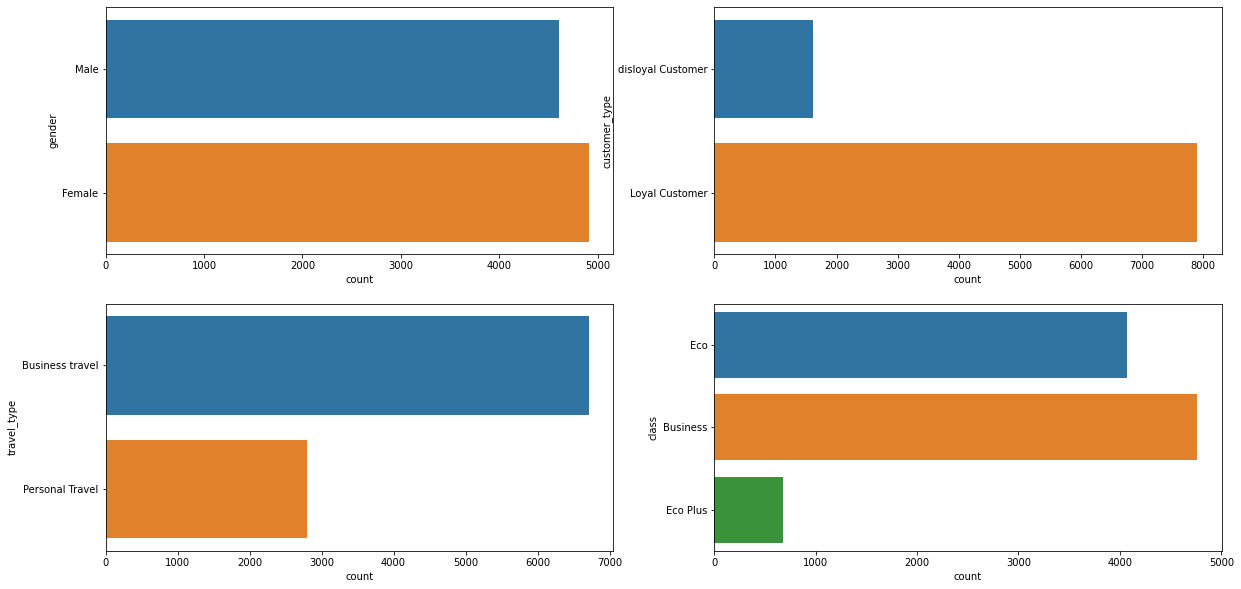

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.countplot(y=df['gender'])

plt.subplot(2,2,2)
sns.countplot(y=df['customer_type'])

plt.subplot(2,2,3)
sns.countplot(y=df['travel_type'])

plt.subplot(2,2,4)
sns.countplot(y=df['class'])
plt.show()

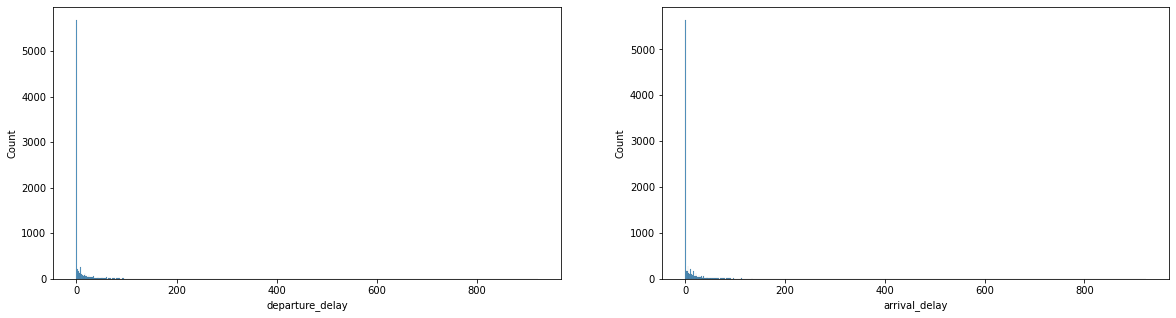

In [9]:
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
sns.histplot(df['departure_delay'])

plt.subplot(1,2,2)
sns.histplot(df['arrival_delay'])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


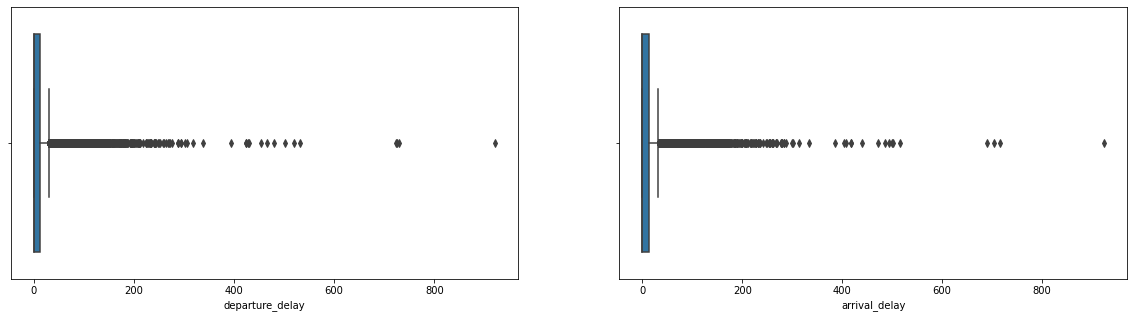

In [10]:
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
sns.boxplot(df['departure_delay'])

plt.subplot(1,2,2)
sns.boxplot(df['arrival_delay'])

plt.show()

In [11]:
mask = (df['arrival_delay'] > 350) & (df['departure_delay'] > 350)
len(df[mask])/len(df)*100

0.15766239226403195

In [12]:
df.drop(
    index=df[mask].index,
    inplace=True
)
df.isnull().sum()

id                  0
gender              0
customer_type       0
age                 0
travel_type         0
class               0
distance            0
wifi                0
time                0
booking             0
gate                0
food                0
boarding            0
seat                0
entertainment       0
on_board            0
leg_room            0
baggage             0
checkin             0
inflight            0
cleanliness         0
departure_delay     0
arrival_delay      28
satisfaction        0
dtype: int64

In [13]:
df['arrival_delay'].fillna(0, inplace=True)
df.isnull().sum()

id                 0
gender             0
customer_type      0
age                0
travel_type        0
class              0
distance           0
wifi               0
time               0
booking            0
gate               0
food               0
boarding           0
seat               0
entertainment      0
on_board           0
leg_room           0
baggage            0
checkin            0
inflight           0
cleanliness        0
departure_delay    0
arrival_delay      0
satisfaction       0
dtype: int64

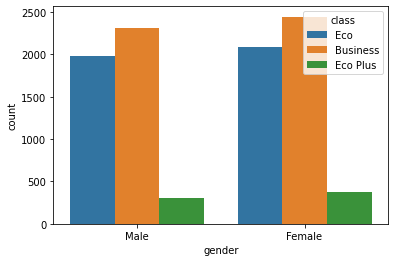

In [14]:
sns.countplot(data=df, x='gender', hue='class')
plt.show()

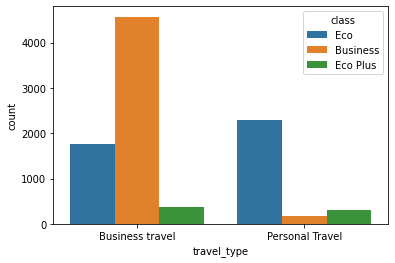

In [15]:
sns.countplot(data=df, x='travel_type', hue='class')
plt.show()

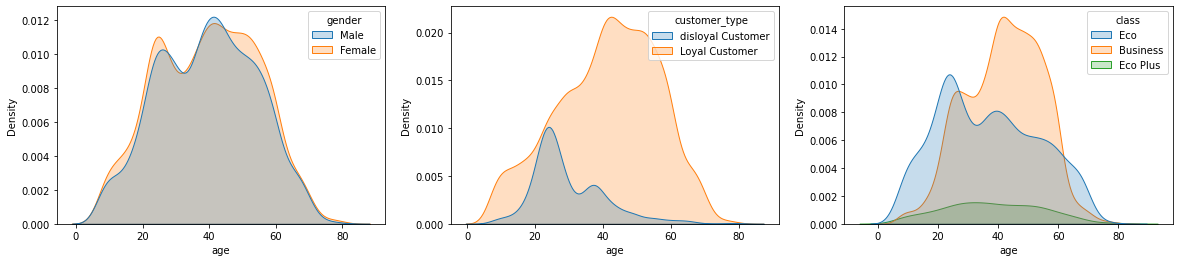

In [16]:
plt.figure(figsize=(20, 4))

plt.subplot(1,3,1)
sns.kdeplot(data=df, x='age', hue='gender', fill=True)

plt.subplot(1,3,2)
sns.kdeplot(data=df, x='age', hue='customer_type', fill=True)

plt.subplot(1,3,3)
sns.kdeplot(data=df, x='age', hue='class', fill=True)
plt.show()

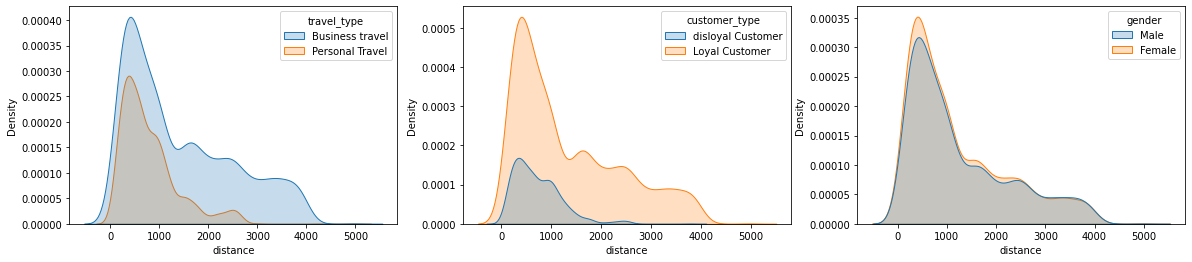

In [17]:
plt.figure(figsize=(20, 4))

plt.subplot(1,3,1)
sns.kdeplot(data=df, x='distance', hue='travel_type', fill=True)

plt.subplot(1,3,2)
sns.kdeplot(data=df, x='distance', hue='customer_type', fill=True)

plt.subplot(1,3,3)
sns.kdeplot(data=df, x='distance', hue='gender', fill=True)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

X_train = train_set.drop("satisfaction", axis=1)
y = train_set["satisfaction"].copy()

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_attribs = ['gender', 'customer_type', 'travel_type', 'class']
num_attribs = ['age', 'distance', 'wifi', 'booking', 'food', 'boarding',
       'seat', 'entertainment', 'on_board', 'leg_room', 'baggage', 'checkin',
       'inflight', 'cleanliness']

full_pipeline = ColumnTransformer([
    ('cat', OneHotEncoder(), cat_attribs),
    ('num', StandardScaler(), num_attribs)
])

In [20]:
X_prepared = full_pipeline.fit_transform(X_train)
X_prepared

array([[ 1.        ,  0.        ,  0.        , ..., -0.282166  ,
        -2.26745684, -1.7542393 ],
       [ 1.        ,  0.        ,  1.        , ...,  1.30670352,
         1.1322185 ,  0.52136064],
       [ 0.        ,  1.        ,  1.        , ..., -1.87103552,
         0.28229966, -1.7542393 ],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -1.87103552,
         0.28229966, -0.23717267],
       [ 0.        ,  1.        ,  0.        , ...,  0.51226876,
         0.28229966, -1.7542393 ],
       [ 0.        ,  1.        ,  1.        , ...,  0.51226876,
        -0.56761917,  0.52136064]])

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_prepared, y)

KNeighborsClassifier(n_neighbors=7)

In [22]:
X_test = full_pipeline.fit_transform(test_set.drop("satisfaction", axis=1))
y_test = test_set["satisfaction"].copy()

In [23]:
y_predict = knn.predict(X_test)

In [24]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.8297029702970297

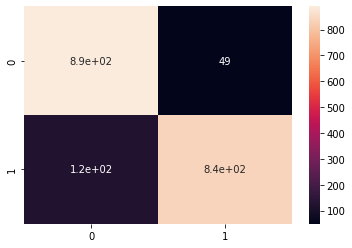

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [26]:
confusion_matrix(y_test, y_predict)

array([[890,  49],
       [123, 838]])

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision}\n{recall}\n{f1}\n{accuracy}")

0.9447576099210823
0.8720083246618107
0.9069264069264068
0.9094736842105263


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       939
           1       0.94      0.87      0.91       961

    accuracy                           0.91      1900
   macro avg       0.91      0.91      0.91      1900
weighted avg       0.91      0.91      0.91      1900



In [29]:
# Cross validation
from sklearn.model_selection import cross_val_predict
X = full_pipeline.fit_transform(df.drop("satisfaction", axis=1))
y = df["satisfaction"].copy()
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      4780
           1       0.94      0.87      0.91      4719

    accuracy                           0.91      9499
   macro avg       0.91      0.91      0.91      9499
weighted avg       0.91      0.91      0.91      9499



In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

knn_gscv.fit(X, y)

knn_gscv.best_params_, knn_gscv.best_score_

({'n_neighbors': 7}, 0.9103065325240431)